## Download Data from Kaggle.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
% cd /content/drive/My Drive/Colab_Notebooks/dog-cat

/content/drive/My Drive/Colab_Notebooks/dog-cat


In [25]:
from google.colab import files
files.upload()

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

In [27]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

To unzip files:

In [28]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/Colab_Notebooks/dog-cat/dogs-vs-cats.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

# 5.2
## Separation of data
Now our work begins! We won't work with entire dataset, rather first 2000 images of cats and dogs each from train folder.

In [29]:
import os, shutil
# our dataset (only train portion)
original_dataset_dir = "/content/drive/My Drive/Colab_Notebooks/dog-cat/train/train"    # we are asked to work with train part only.
# Directory where you’ll store your smaller dataset
base_dir = "/content/drive/My Drive/Colab_Notebooks/dog-cat-small"
os.mkdir(base_dir)


In [30]:
# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [31]:
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [32]:
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [33]:
# now same work for validation and test sets
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [34]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [35]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [36]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [37]:
# now same work for dog pictures

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [38]:
# sanity check
import pandas as pd
d = {
        "Set": ["Train","", "Validation","", "Test",""],
        "Type": ["Cats", "Dogs", "Cats", "Dogs", "Cats", "Dogs"],
        "Number": [len(os.listdir(train_cats_dir)),
                    len(os.listdir(train_dogs_dir)),
                    len(os.listdir(validation_cats_dir)),
                    len(os.listdir(validation_dogs_dir)),
                    len(os.listdir(test_cats_dir)),
                    len(os.listdir(test_dogs_dir))]
    }

p = pd.DataFrame(d)
p

,Set,Type,Number
0,Train,Cats,1000
1,,Dogs,1000
2,Validation,Cats,500
3,,Dogs,500
4,Test,Cats,500
5,,Dogs,500


## A Small convnet

In [39]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

#### Configure the Model for Training

In [41]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

## Data Preprocessing
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as we know, neural networks prefer to deal with small input values).

In [42]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary') #Because we use binary_crossentropy loss, we need binary labels.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#### Fit the model

In [44]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
#it took 1hour to train in my pc

Epoch 1/30
100/100 [==============================] - 121s 1s/step - loss: 0.6907 - acc: 0.5350 - val_loss: 0.6888 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 122s 1s/step - loss: 0.6546 - acc: 0.6130 - val_loss: 0.6265 - val_acc: 0.6620
Epoch 3/30
100/100 [==============================] - 124s 1s/step - loss: 0.5985 - acc: 0.6855 - val_loss: 0.6923 - val_acc: 0.5950
Epoch 4/30
100/100 [==============================] - 121s 1s/step - loss: 0.5596 - acc: 0.7120 - val_loss: 0.6043 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5360 - acc: 0.7295 - val_loss: 0.5747 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.5076 - acc: 0.7490 - val_loss: 0.5862 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 107s 1s/step - loss: 0.4799 - acc: 0.7725 - val_loss: 0.5650 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 109s 1s/step - 

In [45]:
#### Save the model for future use:
model.save('cats_and_dogs_small_1.h5')

### Evaluation

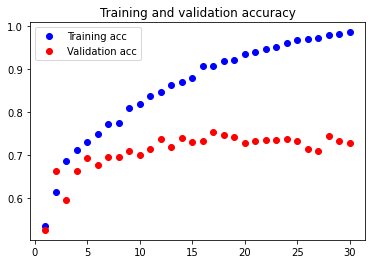

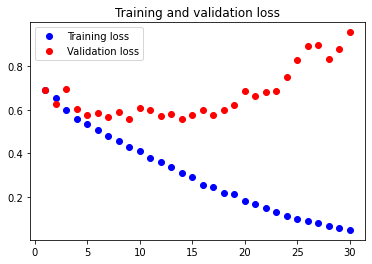

In [46]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of **overfitting**. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0.<br>
For a small dataset with images, we can fight this generating more images with flip/ rotate/ translate etc. 

## Data Augmentation

In [47]:
datagen = ImageDataGenerator(
    rotation_range=40,      # value in degree
    width_shift_range=0.2,  # range for randomly translate pic
    height_shift_range=0.2,
    shear_range=0.2,        # random shearing transform
    zoom_range=0.2,         # zooming inside
    horizontal_flip=True,   # random flip half the image horiz.
    fill_mode='nearest')    # filling in newly created px

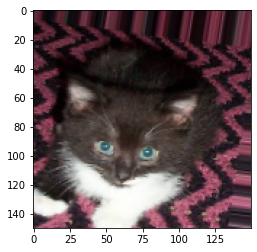

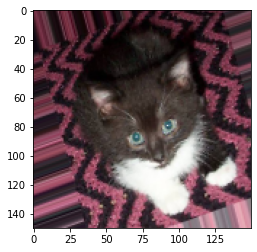

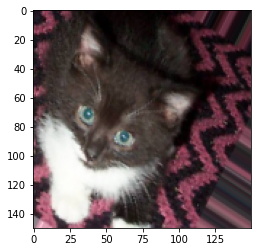

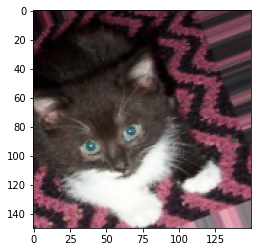

In [48]:
# have a watch over agumented pix
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]    # img to augment

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # Converts to np array of (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshape to (1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### A new ConvNet including Dropout
to fight further overfitting

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

### Now train model again

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)
# it would take about 3.5hours. Because #epochs is more (100)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 124s 1s/step - loss: 0.6940 - acc: 0.5045 - val_loss: 0.6865 - val_acc: 0.5960
Epoch 2/100
100/100 [==============================] - 127s 1s/step - loss: 0.6845 - acc: 0.5525 - val_loss: 0.6718 - val_acc: 0.5930
Epoch 3/100
100/100 [==============================] - 125s 1s/step - loss: 0.6762 - acc: 0.5740 - val_loss: 0.6793 - val_acc: 0.5650
Epoch 4/100
100/100 [==============================] - 126s 1s/step - loss: 0.6647 - acc: 0.5930 - val_loss: 0.6370 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 135s 1s/step - loss: 0.6557 - acc: 0.6070 - val_loss: 0.6266 - val_acc: 0.6510
Epoch 6/100
100/100 [==============================] - 129s 1s/step - loss: 0.6411 - acc: 0.6420 - val_loss: 0.6211 - val_acc: 0.6620
Epoch 7/100
100/100 [==============================] - 130s 1s/step - loss: 0.6228 - acc: 0.6455 - val_loss: 0.6

In [ ]:
# save for future use
model.save('cats_and_dogs_small_2.h5')

In [ ]:
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch = 100 will give much good result. Due to loadshedding after 59 epochs, I couldn't plot the value. You can choose 100 and see the result.